In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use("ggplot")

In [3]:
data = pd.read_csv("diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.Outcome.unique()

array([1, 0])

In [10]:
data["Outcome"].value_counts()*100/len(data)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

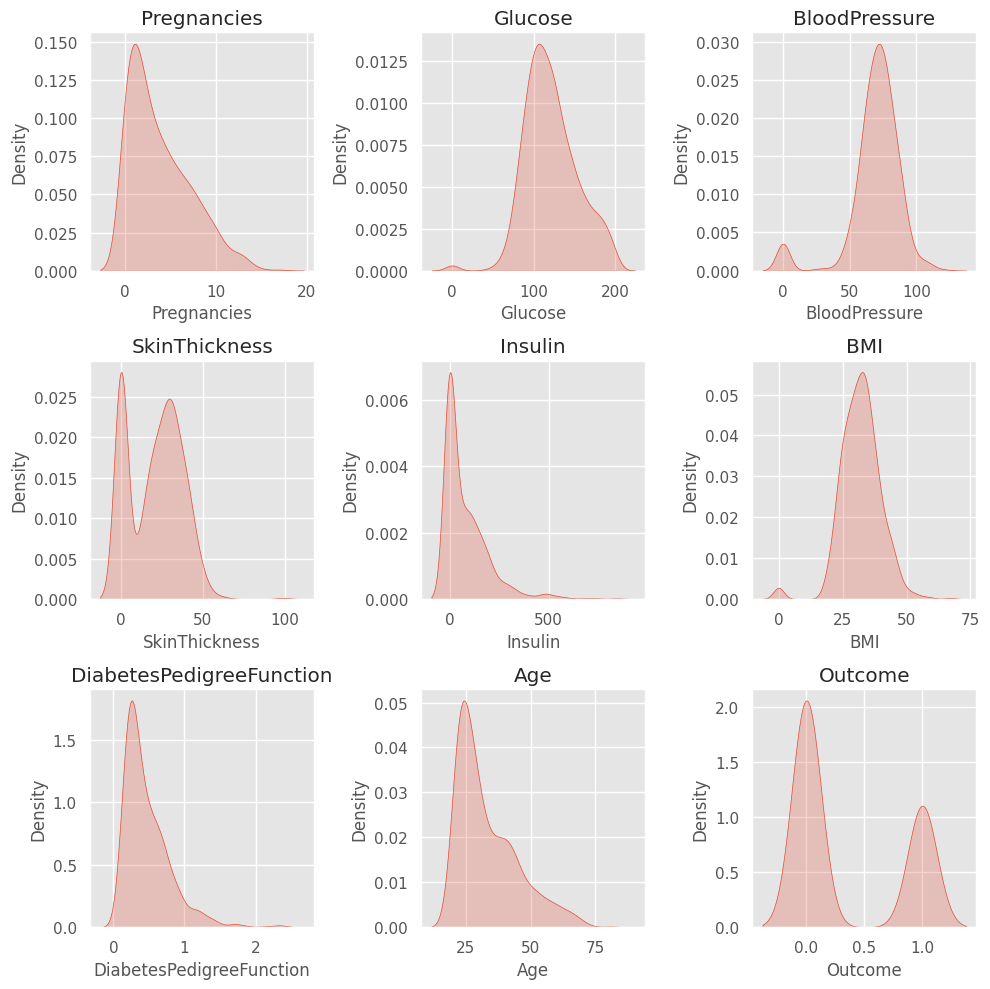

In [11]:
plt.figure(figsize=(10, 10))
plotnumber = 1
columns = data.columns

for col in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.kdeplot(data[col], fill=True)
        ax.set_title(col)
        plt.xlabel(col)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [12]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


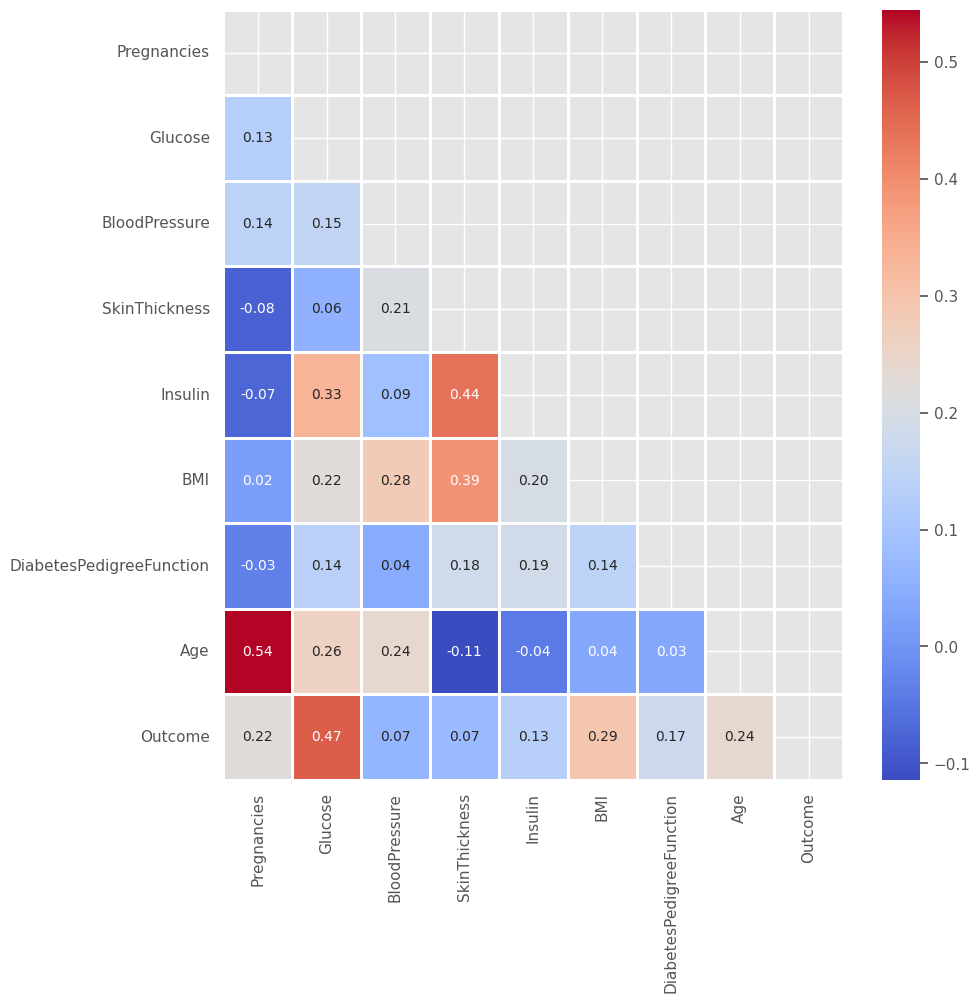

In [13]:
plt.figure(figsize=(10,10))
corr=data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt = ".2f", cmap="coolwarm")
plt.show()

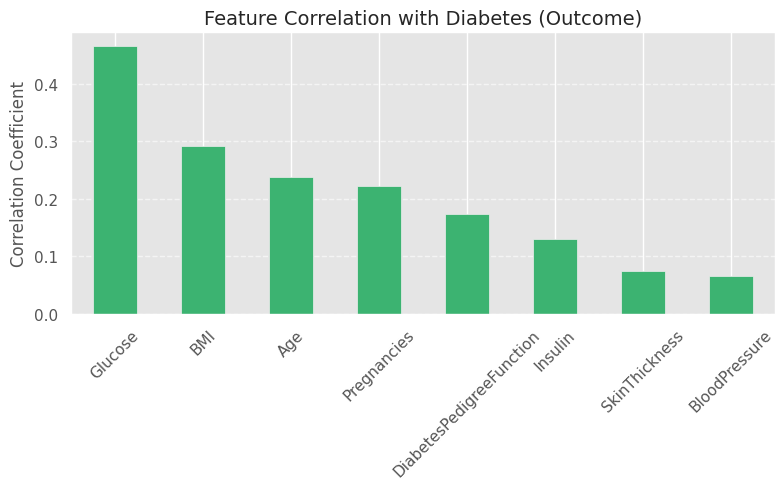

In [14]:
cor_target = data.corr()["Outcome"].drop("Outcome").sort_values(ascending=False)

plt.figure(figsize=(8,5))
cor_target.plot(kind="bar", color="mediumseagreen")
plt.title("Feature Correlation with Diabetes (Outcome)", fontsize=14)
plt.axhline(0, color='black', linewidth=0.5)
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [15]:
X = data.drop(columns = "Outcome", axis = 1)
Y = data["Outcome"]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [17]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train.shape

(614, 8)

In [19]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [20]:
y_pred = log_reg.predict(X_test)

In [21]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Y_train, log_reg.predict(X_train)))
log_reg_acc = accuracy_score(Y_test, log_reg.predict(X_test))
print(log_reg_acc)
y_pred = log_reg.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.762214983713355
0.8246753246753247
[[98  9]
 [18 29]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [23]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [24]:
y_pred = knn.predict(X_test)

In [25]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
print(accuracy_score(Y_train, knn.predict(X_train)))
knn_acc = accuracy_score(Y_test, knn.predict(X_test))
print(knn_acc)
y_pred = knn.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.8110749185667753
0.7987012987012987
[[93 14]
 [17 30]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.68      0.64      0.66        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.80      0.80      0.80       154



In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC(probability = True)

parameters = {
    "gamma" : [0.0001, 0.001, 0.01, 0.1],
    "C" : [0.01, 0.05, 0.5, 0.1, 1, 10]
    
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, Y_train)

,estimator,SVC(probability=True)
,param_grid,"{'C': [0.01, 0.05, ...], 'gamma': [0.0001, 0.001, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [28]:
grid_search.best_params_

{'C': 10, 'gamma': 0.01}

In [29]:
grid_search.best_score_

np.float64(0.7639077702252433)

In [30]:
svc = SVC(C=10, gamma= 0.01, probability=True)
svc.fit(X_train, Y_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,0.01
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [31]:
y_pred = svc.predict(X_test)

In [32]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [33]:
print(accuracy_score(Y_train, svc.predict(X_train)))
svc_acc = accuracy_score(Y_test, svc.predict(X_test))
print(svc_acc)
y_pred = svc.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.7850162866449512
0.8181818181818182
[[99  8]
 [20 27]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       107
           1       0.77      0.57      0.66        47

    accuracy                           0.82       154
   macro avg       0.80      0.75      0.77       154
weighted avg       0.81      0.82      0.81       154



In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
parameters = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : range(2,32,1),
    "min_samples_leaf" : range(1, 10, 1),
    "min_samples_split" : range(2,10,1),
    "splitter" : ["best", "random"]
}

grid_search_dt = GridSearchCV(dtc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, Y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': range(2, 32), 'min_samples_leaf': range(1, 10), 'min_samples_split': range(2, 10), ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [35]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 3,
 'min_samples_split': 9,
 'splitter': 'random'}

In [36]:
grid_search_dt.best_score_

np.float64(0.7606157536985206)

In [37]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=15, min_samples_leaf=7, min_samples_split=9, splitter="random")

In [38]:
dtc.fit(X_train, Y_train)

,criterion,'entropy'
,splitter,'random'
,max_depth,15
,min_samples_split,9
,min_samples_leaf,7
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [39]:
print(accuracy_score(Y_train, dtc.predict(X_train)))
dtc_acc = accuracy_score(Y_test, dtc.predict(X_test))
print(dtc_acc)
y_pred = dtc.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.8078175895765473
0.7012987012987013
[[85 22]
 [24 23]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       107
           1       0.51      0.49      0.50        47

    accuracy                           0.70       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.70      0.70      0.70       154



In [40]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 0.5, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, Y_train)

,n_estimators,130
,criterion,'entropy'
,max_depth,10
,min_samples_split,3
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,0.5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
y_pred = rand_clf.predict(X_test)

In [42]:
y_pred = rand_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Y_train, rand_clf.predict(X_train)))
rand_clf_acc = accuracy_score(Y_test, rand_clf.predict(X_test))
print(rand_clf_acc)
y_pred = rand_clf.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.9788273615635179
0.8181818181818182
[[95 12]
 [16 31]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       107
           1       0.72      0.66      0.69        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.82       154



In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gbc = GradientBoostingClassifier()
parameters = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.001, 0.1],
    'n_estimators': [100, 150, 180]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv=2, n_jobs=-1, verbose=1)
grid_search_gbc.fit(X_train, Y_train)

print(grid_search_gbc.best_params_)

best_gbc = grid_search_gbc.best_estimator_


Fitting 2 folds for each of 12 candidates, totalling 24 fits
{'learning_rate': 0.1, 'loss': 'log_loss', 'n_estimators': 100}


In [44]:
grid_search_gbc.best_score_

np.float64(0.739413680781759)

In [45]:
y_pred_train = best_gbc.predict(X_train)
y_pred_test = best_gbc.predict(X_test)

gbc_acc = accuracy_score(Y_train, y_pred_train)
print("Test Accuracy:", accuracy_score(Y_test, y_pred_test))

print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_test))
print("Classification Report:\n", classification_report(Y_test, y_pred_test))

Test Accuracy: 0.8051948051948052
Confusion Matrix:
 [[92 15]
 [15 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       107
           1       0.68      0.68      0.68        47

    accuracy                           0.81       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.81      0.81      0.81       154



In [46]:
from xgboost import XGBClassifier 
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, Y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(Y_test, xgb.predict(X_test))
print(xgb_acc)
y_pred = xgb.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.8729641693811075
0.8116883116883117
[[96 11]
 [18 29]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       107
           1       0.72      0.62      0.67        47

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154



In [48]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(rand_clf_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,Gradient Boosting Classifier,91.86
0,Logistic Regression,82.47
2,SVM,81.82
4,Random Forest Classifier,81.82
6,XgBoost,81.17
1,KNN,79.87
3,Decision Tree Classifier,70.13


In [49]:
import pickle
model = log_reg
pickle.dump(model, open("diabetes.pkl","wb"))

In [50]:
scaling = scaler
pickle.dump(scaling, open("diabetes_scaler.pkl","wb"))

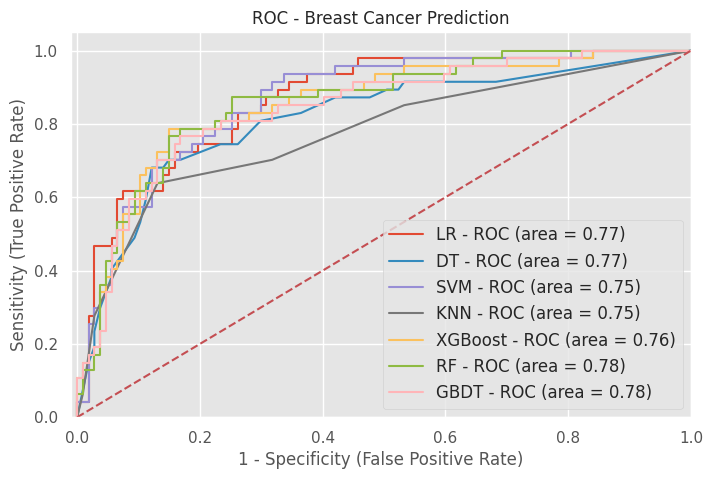

In [ ]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, Y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(Y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[82.47, 70.13000000000001, 81.82000000000001, 79.86999999999999, 81.17, 81.82000000000001, 91.86]
[76.64999999999999, 69.84, 74.99, 75.37, 75.71, 78.56, 78.56]


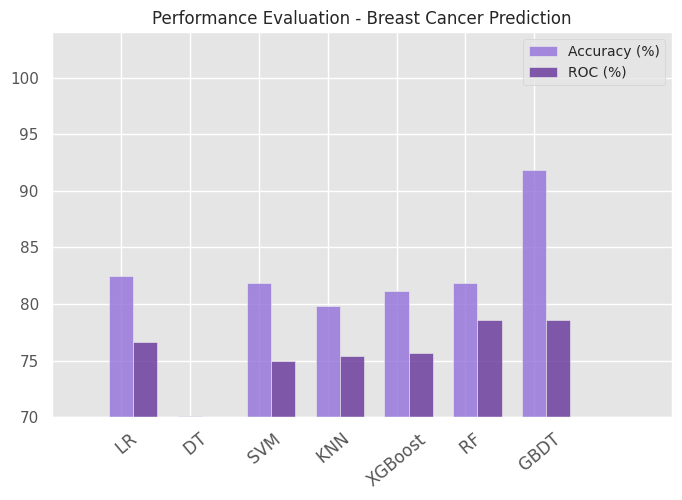

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(log_reg_acc,4), 100*round(dtc_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4), 
                  100*round(rand_clf_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, Y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(Y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([70, 104])

plt.title('Performance Evaluation - Diabetes Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_Diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [53]:
from sklearn.model_selection import RandomizedSearchCV

models_and_params = {
    "Logistic Regression": {
        "model": LogisticRegression(solver='liblinear'),
        "params": {
            "C": [0.01, 0.1, 1, 10, 100],
            "penalty": ["l1", "l2"]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": range(3, 30),
            "weights": ["uniform", "distance"],
            "metric": ["euclidean", "manhattan"]
        }
    },
    "SVM": {
        "model": SVC(probability=True),
        "params": {
            "C": [0.1, 1, 10],
            "gamma": [0.001, 0.01, 0.1],
            "kernel": ["rbf"]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "max_depth": range(2, 30),
            "min_samples_split": range(2, 10),
            "min_samples_leaf": range(1, 10),
            "criterion": ["gini", "entropy"],
            "splitter": ["best", "random"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50, 100, 150],
            "max_depth": [5, 10, 20, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "bootstrap": [True, False]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(),
        "params": {
            "n_estimators": [100, 150],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 4, 5],
            "loss": ["log_loss", "exponential"]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
        "params": {
            "n_estimators": [100, 150],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 4, 5],
            "subsample": [0.8, 1.0],
            "colsample_bytree": [0.8, 1.0]
        }
    }
}


In [54]:
tuned_models = {}
results = []

for name, mp in models_and_params.items():
    print(f"Tuning {name}...")
    grid = RandomizedSearchCV(mp["model"], mp["params"],
                              cv=5, n_iter=15, scoring="accuracy", n_jobs=-1, random_state=42, verbose=0)
    grid.fit(X_train, Y_train)
    tuned_models[name] = grid.best_estimator_
    
    train_score = accuracy_score(Y_train, grid.best_estimator_.predict(X_train))
    test_score = accuracy_score(Y_test, grid.best_estimator_.predict(X_test))
    results.append((name, train_score, test_score))
    print(f" {name} done. Train: {train_score:.3f}, Test: {test_score:.3f}\n")


Tuning Logistic Regression...
 Logistic Regression done. Train: 0.765, Test: 0.825

Tuning KNN...
 KNN done. Train: 1.000, Test: 0.831

Tuning SVM...


/mnt/c/Users/Livan/OneDrive/Masaüstü/MEDICAI/medicai/lib/python3.11/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 10 is smaller than n_iter=15. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/mnt/c/Users/Livan/OneDrive/Masaüstü/MEDICAI/medicai/lib/python3.11/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=15. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


 SVM done. Train: 0.785, Test: 0.818

Tuning Decision Tree...
 Decision Tree done. Train: 0.801, Test: 0.753

Tuning Random Forest...
 Random Forest done. Train: 0.976, Test: 0.812

Tuning Gradient Boosting...
 Gradient Boosting done. Train: 0.796, Test: 0.805

Tuning XGBoost...


/mnt/c/Users/Livan/OneDrive/Masaüstü/MEDICAI/medicai/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:41:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/mnt/c/Users/Livan/OneDrive/Masaüstü/MEDICAI/medicai/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:41:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/mnt/c/Users/Livan/OneDrive/Masaüstü/MEDICAI/medicai/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:41:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/mnt/c/Users/Livan/OneDrive/Masaüstü/MEDICAI/medicai/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:41:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_en

 XGBoost done. Train: 0.840, Test: 0.805



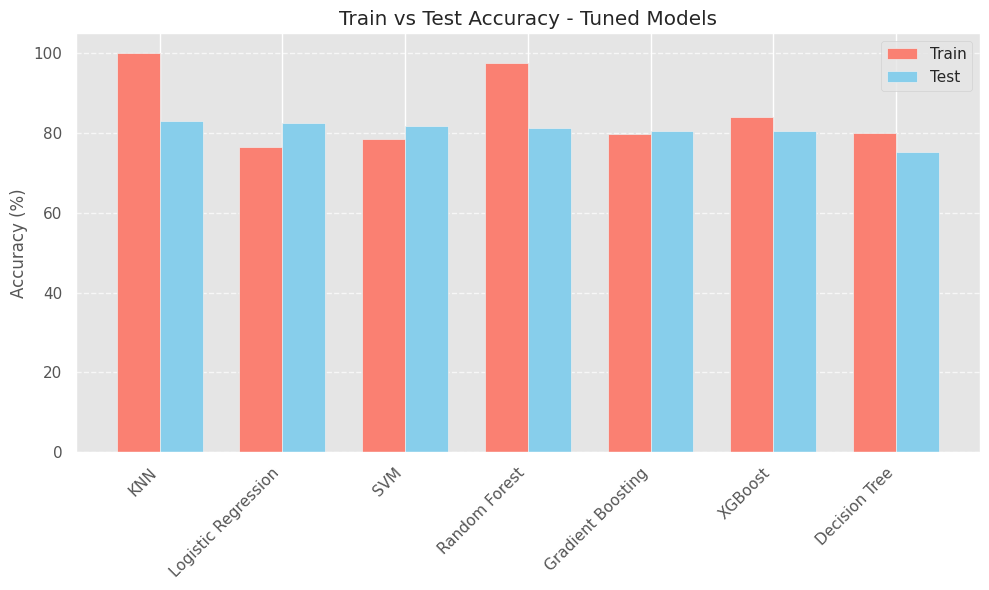

In [55]:
results_df = pd.DataFrame(results, columns=["Model", "Train Accuracy", "Test Accuracy"])
results_df = results_df.sort_values(by="Test Accuracy", ascending=False)

plt.figure(figsize=(10,6))
bar_width = 0.35
x = np.arange(len(results_df))

plt.bar(x - bar_width/2, results_df["Train Accuracy"]*100, bar_width, label="Train", color="salmon")
plt.bar(x + bar_width/2, results_df["Test Accuracy"]*100, bar_width, label="Test", color="skyblue")

plt.xticks(x, results_df["Model"], rotation=45, ha="right")
plt.ylabel("Accuracy (%)")
plt.title("Train vs Test Accuracy - Tuned Models")
plt.legend()
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


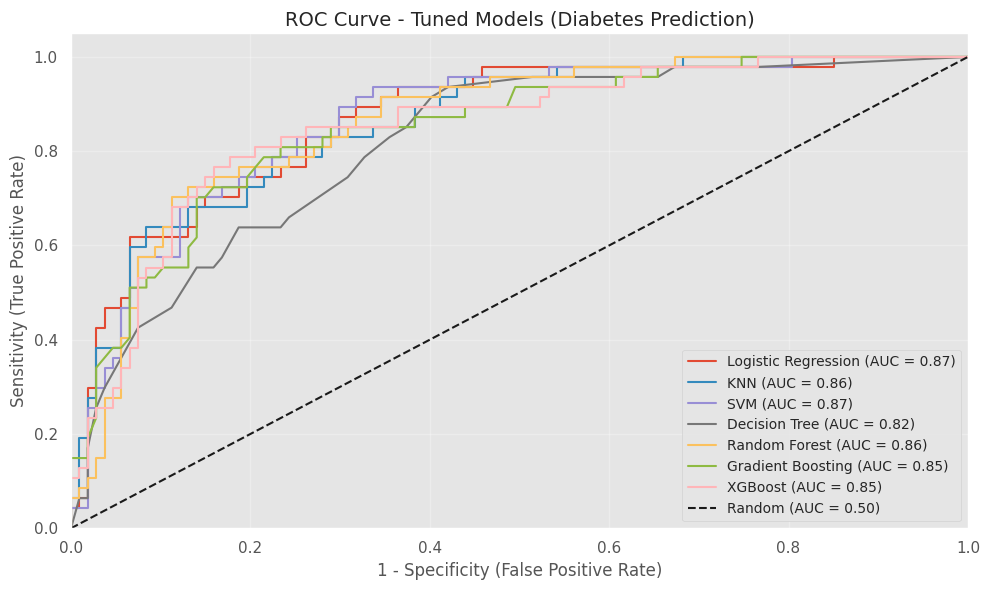

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for name, model in tuned_models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:,1]
    else:
        y_score = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(Y_test, y_score)
    auc_score = roc_auc_score(Y_test, y_score)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.50)")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("1 - Specificity (False Positive Rate)", fontsize=12)
plt.ylabel("Sensitivity (True Positive Rate)", fontsize=12)
plt.title("ROC Curve - Tuned Models (Diabetes Prediction)", fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


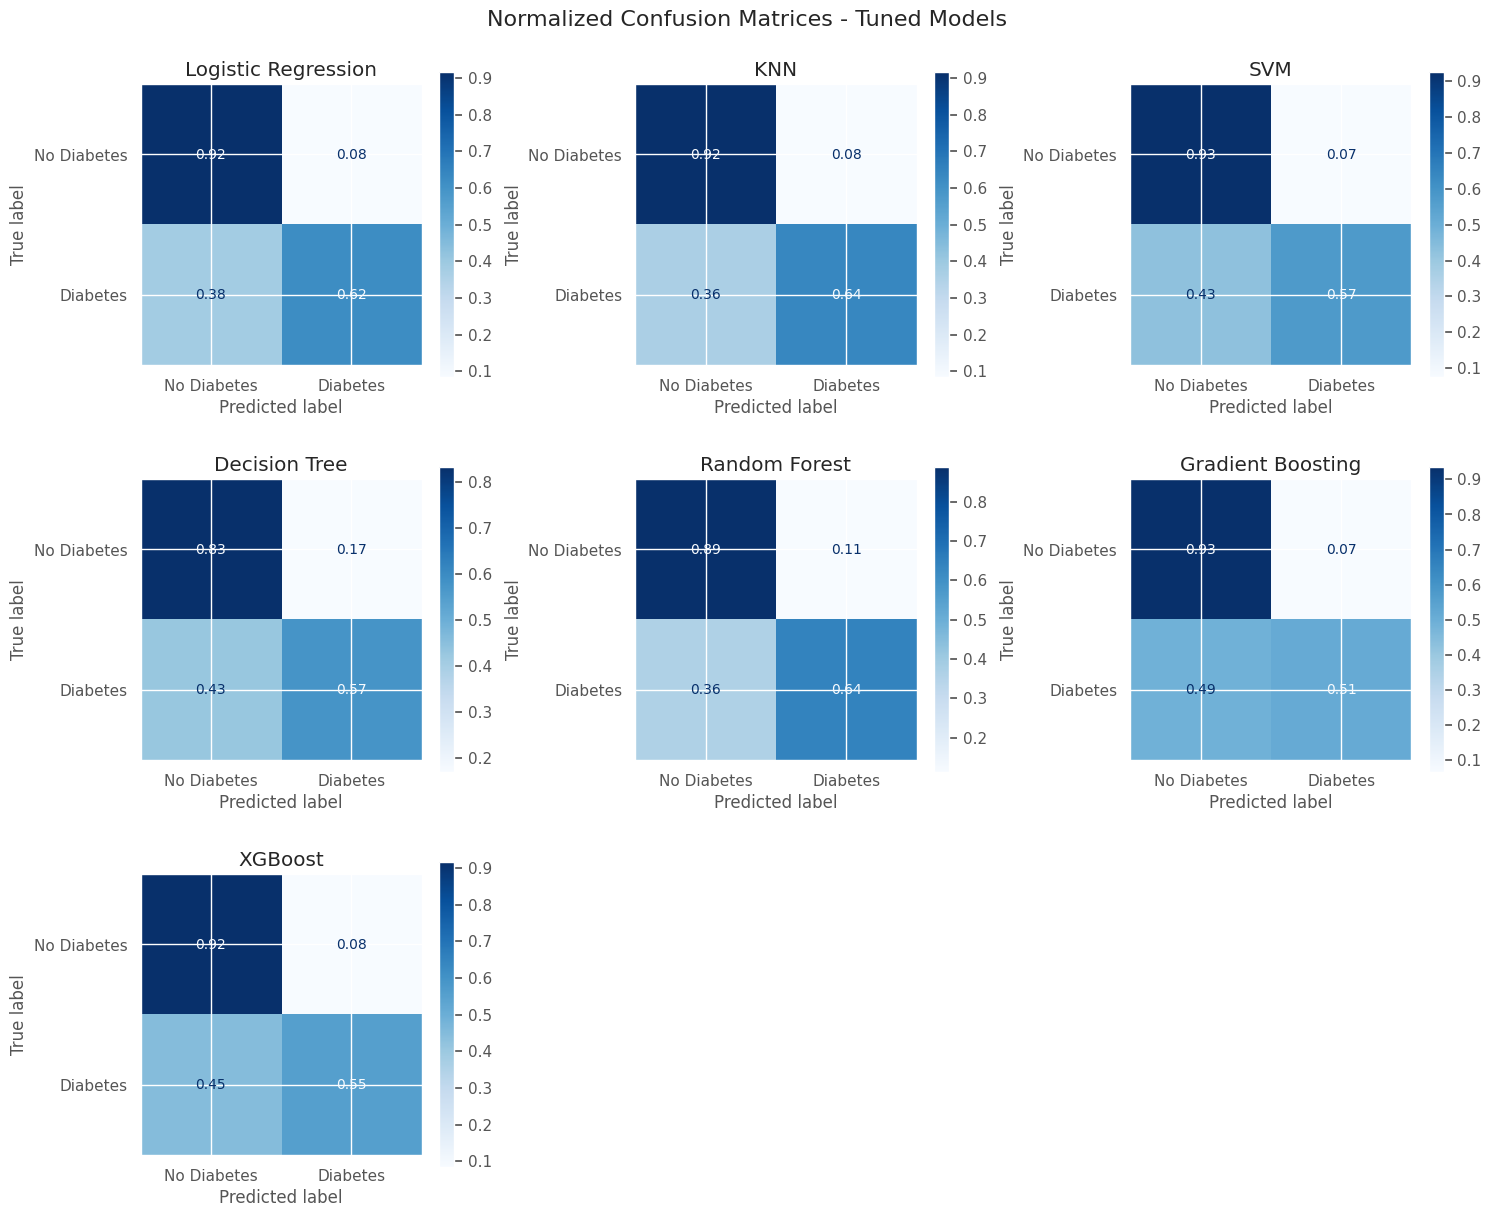

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, (name, model) in enumerate(tuned_models.items()):
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        Y_test,
        normalize='true',
        cmap='Blues',
        ax=axes[i],
        values_format=".2f",
        display_labels=['No Diabetes', 'Diabetes']
    )
    axes[i].set_title(f"{name}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Normalized Confusion Matrices - Tuned Models", fontsize=16, y=1.02)
plt.show()
